In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('data_karapetyan_final.csv', sep=';')

In [3]:
df.head()

,Name of the Movie,IMDB,Critics(CRS),Dir_Nominated,Dir_Prized,Writ_Nominated,Writ_Prize,Act_Nominated,Acto_Prized,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Production Budget (PB),Box Office(US),Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,The Survivalist,"6,3",77.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1293300,33973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Furious 7,"7,7",67.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,190000000,350034110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: the Force Awakens,"8,1",81.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,245000000,936627416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mad Max :Fury Road,"8,1",90.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,150000000,153629485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50 Shades of Gray,"4,1",46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40000000,166147885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

Name of the Movie          751
IMDB                       751
Critics(CRS)               751
Dir_Nominated              751
Dir_Prized                 751
Writ_Nominated             751
Writ_Prize                 751
Act_Nominated              751
Acto_Prized                751
Action                     751
Animation                  751
Comedy                     751
Drama                      751
Other                      751
G                          751
PG                         751
PG-13                      751
R                          751
Production Budget (PB)     751
Box Office(US)             751
Unnamed: 20               1011
Unnamed: 21               1011
Unnamed: 22               1011
Unnamed: 23               1011
Unnamed: 24               1011
Unnamed: 25               1011
Unnamed: 26               1011
Unnamed: 27               1011
dtype: int64

In [6]:
drop_percentage=round(null_cols[null_cols>0]/df.shape[0]*100,2)
drop_percentage

#percentage of null value in each column

Name of the Movie          74.28
IMDB                       74.28
Critics(CRS)               74.28
Dir_Nominated              74.28
Dir_Prized                 74.28
Writ_Nominated             74.28
Writ_Prize                 74.28
Act_Nominated              74.28
Acto_Prized                74.28
Action                     74.28
Animation                  74.28
Comedy                     74.28
Drama                      74.28
Other                      74.28
G                          74.28
PG                         74.28
PG-13                      74.28
R                          74.28
Production Budget (PB)     74.28
Box Office(US)             74.28
Unnamed: 20               100.00
Unnamed: 21               100.00
Unnamed: 22               100.00
Unnamed: 23               100.00
Unnamed: 24               100.00
Unnamed: 25               100.00
Unnamed: 26               100.00
Unnamed: 27               100.00
dtype: float64

In [7]:
drop_cols=drop_percentage[drop_percentage>75].index
drop_cols

Index(['Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [0]:
df=df.drop(drop_cols,axis=1)

In [9]:
df.head()

,Name of the Movie,IMDB,Critics(CRS),Dir_Nominated,Dir_Prized,Writ_Nominated,Writ_Prize,Act_Nominated,Acto_Prized,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Production Budget (PB),Box Office(US)
0,The Survivalist,"6,3",77.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1293300,33973
1,Furious 7,"7,7",67.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,190000000,350034110
2,Star Wars: the Force Awakens,"8,1",81.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,245000000,936627416
3,Mad Max :Fury Road,"8,1",90.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,150000000,153629485
4,50 Shades of Gray,"4,1",46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40000000,166147885


In [10]:
df.columns

Index(['Name of the Movie', 'IMDB', 'Critics(CRS)', 'Dir_Nominated',
       'Dir_Prized', 'Writ_Nominated', 'Writ_Prize', 'Act_Nominated',
       'Acto_Prized', 'Action', 'Animation', 'Comedy', 'Drama', 'Other', 'G',
       'PG', 'PG-13', 'R', 'Production Budget (PB)', 'Box Office(US)'],
      dtype='object')

In [11]:
df.rename(columns= {"Name of the Movie":"Movie",
                    "Critics(CRS)":"Press Rating",
                    "IMDB":"IMDB Rating",
                    "Production Budget (PB)":"Budget",
                    'Box Office(US)':'US Gross'}, inplace=True)
df=df.drop(['Writ_Prize','Act_Nominated'],axis=1)
df.drop(list(df.filter(regex = 'Dir')), axis = 1, inplace = True)
df.head()

,Movie,IMDB Rating,Press Rating,Writ_Nominated,Acto_Prized,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Budget,US Gross
0,The Survivalist,"6,3",77.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1293300,33973
1,Furious 7,"7,7",67.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,190000000,350034110
2,Star Wars: the Force Awakens,"8,1",81.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,245000000,936627416
3,Mad Max :Fury Road,"8,1",90.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,150000000,153629485
4,50 Shades of Gray,"4,1",46.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40000000,166147885


In [12]:
df = df[pd.isnull(df['US Gross']) == False]
df.shape

#df = df.fillna(0)
#dg = df[df['US Gross'] != 0]

(260, 16)

In [13]:
import numpy as np
df['US Gross']=df['US Gross'].str.replace(" ","").astype(int)
df['Budget']=df['Budget'].str.replace(" ","").astype(int)
df['IMDB Rating']=df['IMDB Rating'].str.replace(" ","").str.replace(',','.').astype(np.float64)

df.dtypes

Movie              object
IMDB Rating       float64
Press Rating      float64
Writ_Nominated    float64
Acto_Prized       float64
Action            float64
Animation         float64
Comedy            float64
Drama             float64
Other             float64
G                 float64
PG                float64
PG-13             float64
R                 float64
Budget              int64
US Gross            int64
dtype: object

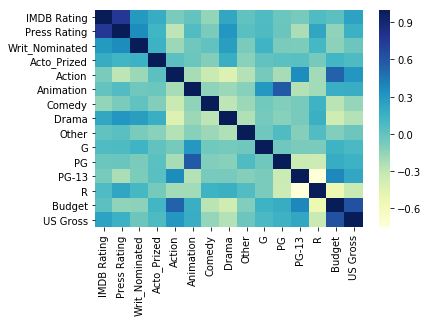

In [14]:
sns.heatmap(df.corr(), cmap='YlGnBu')
#overview of the dataframe

#Gross is highly related to budget
#IMDB is highly related to Press
#Action type is highly related to Budget
#Animation type is highly related to PG
#Drama is mildly related to Press Rating
#Drama is mildly related to Actor Prized
#Drama is the most recognized genre
#Writer_Nom is higly related to Press Rating

In [0]:
LG = df.drop(['Movie','G', 'PG', 'PG-13', 'R', 'Budget', 'US Gross'],axis=1)

#zoom on correlation between 'Press & IMDB Ratings' and 'Genre & Awards recognition'

(0, 250000000)

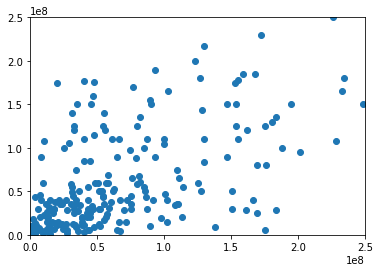

In [17]:
plt.scatter(df['US Gross'], df.Budget)
plt.xlim(0, 250000000)
plt.ylim(0, 250000000)

(0, 300000000)

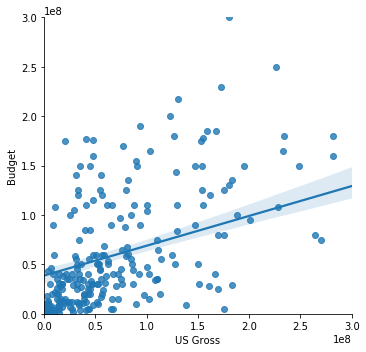

In [18]:
sns.lmplot('US Gross','Budget',data=df)
plt.xlim(0, 300000000)
plt.ylim(0, 300000000)

# correlation budget / gross

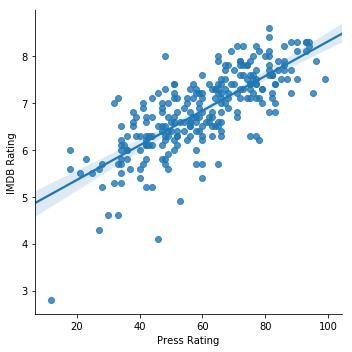

In [19]:
sns.lmplot('Press Rating','IMDB Rating',data=df)
#very strong correlation

In [0]:
df['IMDB Rating'] = df['IMDB Rating'].apply(lambda x: x*10)
# converting IMDB ratings to the same scale of that in Press Ratings

In [21]:
df[df['Press Rating']<20]
# three least liked movies by the press

,Movie,IMDB Rating,Press Rating,Writ_Nominated,Acto_Prized,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Budget,US Gross
158,Mother's day,56.0,18.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,25000000,32463917
190,Dirty Grandpa,60.0,18.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,27500000,35537564
246,Emoji,28.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50000000,86089513


In [22]:
df[df['IMDB Rating']<45]
#three least liked movies by IMDB users
#IMDB users give "higher" low ratings to the movies they don't like
# than the press. 
#EMOJI is the only common movie in the 2 bottom three podiums.

,Movie,IMDB Rating,Press Rating,Writ_Nominated,Acto_Prized,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Budget,US Gross
4,50 Shades of Gray,41.0,46.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40000000,166147885
64,Fantastic Four,43.0,27.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,120000000,56114221
246,Emoji,28.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50000000,86089513


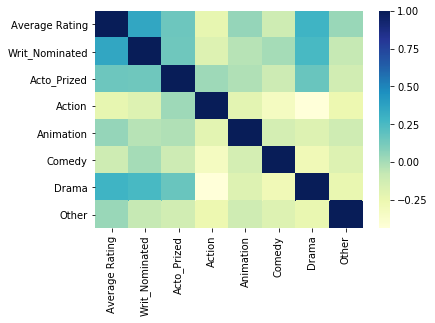

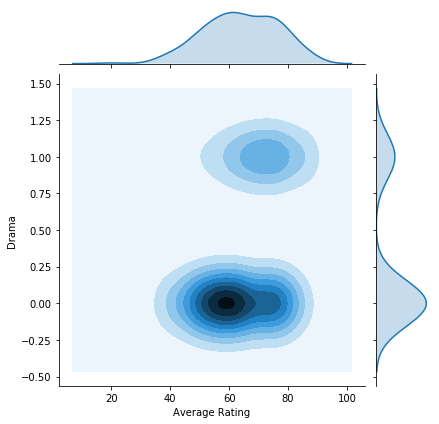

In [28]:
df['Average Rating'] = df[["IMDB Rating", "Press Rating"]].mean(axis=1)
#merging 2 columns into 1
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
ratings = df.ix[:, cols]
#bringing 'Average Rating to the beginning of the df for convenience purposes'
ratings=ratings.drop(['Movie','G', 'PG', 'PG-13', 'R', 'Budget', 'US Gross',
              "IMDB Rating", "Press Rating"],axis=1)


sns.heatmap(ratings.corr(), cmap='YlGnBu')
sns.jointplot('Average Rating','Drama', data = ratings, kind = 'kde')

#correlation analysis
#if a movie is a drama, it is more likely to get a high 
#average rating than if it is not.
# if a movie is a drama, chances are high that its writer and/or its main 
# actor got awards in the past.

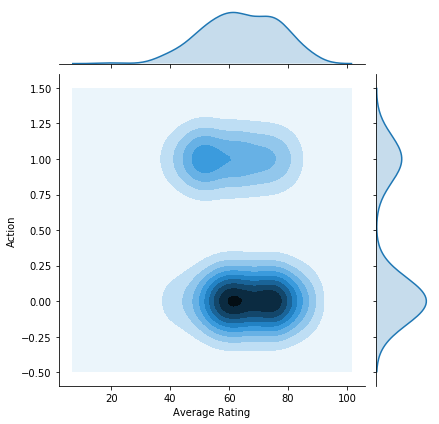

In [29]:
sns.jointplot('Average Rating','Action', data = ratings, kind = 'kde')
#action movies are overall mildly appreciated

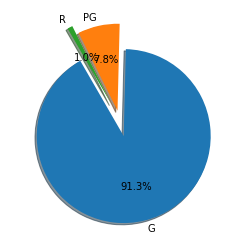

In [30]:
# animated movies
anim = df[['Animation','G','PG','PG-13','R']]
anim = anim[anim['Animation'] != 0]
anim.shape

#21 animated movies in the database

G = anim['G'].agg(sum)/anim['Animation'].agg(sum)*100
PG = anim['PG'].agg(sum)/anim['Animation'].agg(sum)
PG13= anim['PG-13'].agg(sum)/anim['Animation'].agg(sum)
R = anim['R'].agg(sum)/anim['Animation'].agg(sum)
animated = [G,PG,PG13,R]

def sd(x):
  return x*100  

percentages = [round((sd(x)),0) for x in animated]
percentages = [x for x in percentages if x != 0]
labels=['G','PG','R']
sizes=percentages
explode=(0.2,0.1,0.2)
fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=120)
plt.show()

# pie chart of Animated movies' parental ratings. PG indicates that 
# movies include some moments of mild violence. There's an evolution
# compared to the the big Disney movies that were all rated G.

In [32]:
#PROFITABILITY

profit = df[['Movie','US Gross','Budget']]

profit['Profitability'] = ((profit['US Gross']-profit.Budget)/profit.Budget)*100

profit.nsmallest(5, 'Profitability').sort_values('Profitability', ascending=False)
#the 5 least profitable movies of the list

,Movie,US Gross,Budget,Profitability
146,A Monster Call,3730982,43000000,-91.323298
86,By the Sea,531009,10000000,-94.689910
0,The Survivalist,33973,1293300,-97.373154
27,Knock Knock,34004,2500000,-98.639840
72,Mr. Right,25369,8000000,-99.682887


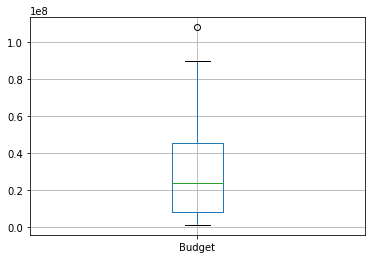

In [51]:
flops = profit.nsmallest(15, 'Profitability')
flops = flops.where(flops.Budget < 110000000)
flops = flops.dropna()
#flops.sort_values('Budget', ascending=False)
flops.boxplot(column='Budget')

In [33]:
profit.nlargest(5, 'Profitability').sort_values('Profitability', ascending=False)
#the 5 most profitable movies of the list

,Movie,US Gross,Budget,Profitability
207,Get Out,175484140,5000000,3409.682800
120,Moonlight,27850912,1500000,1756.727467
100,Split,138120085,9000000,1434.667611
75,"Hello, My name is Dorith",14443077,1000000,1344.307700
185,Lights out,67235683,4900000,1272.156796


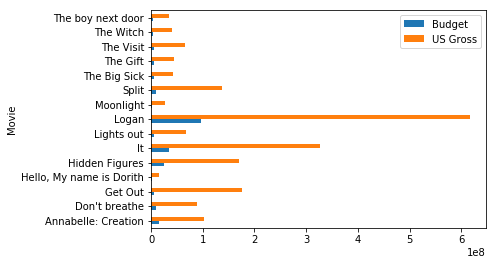

In [54]:
tops = profit.nlargest(15, 'Profitability')
tops[['Budget','US Gross', 'Movie']].groupby(['Movie']).agg('mean').plot.barh()
#vehicles[['Highway MPG','City MPG','Drivetrain']].groupby(['Drivetrain']).agg('mean').plot.barh()

In [55]:
tops

,Movie,US Gross,Budget,Profitability,Budget League,profit
207,Get Out,175484140,5000000,3409.682800,below $50M,1000
120,Moonlight,27850912,1500000,1756.727467,below $50M,1000
100,Split,138120085,9000000,1434.667611,below $50M,1000
75,"Hello, My name is Dorith",14443077,1000000,1344.307700,below $50M,1000
185,Lights out,67235683,4900000,1272.156796,below $50M,1000
35,The Visit,65069140,5000000,1201.382800,below $50M,1000
20,The Witch,40300000,3500000,1051.428571,below $50M,1000
209,It,327235912,35000000,834.959749,below $50M,500
135,Don't breathe,89210468,9900000,801.115838,below $50M,500
92,The boy next door,35385560,4000000,784.639000,below $50M,500


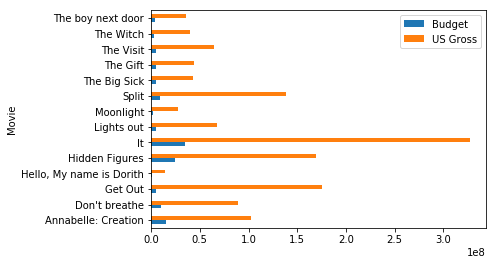

In [57]:
tops = tops.where(tops.Movie != 'Logan')
tops[['Budget','US Gross', 'Movie']].groupby(['Movie']).agg('mean').plot.barh()

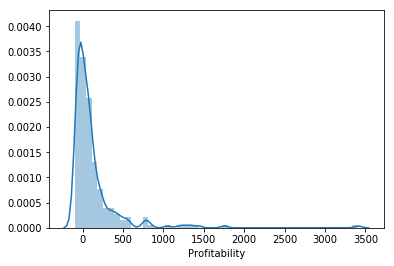

In [34]:
sns.distplot(profit.Profitability)
#overview of the profitability rates

In [36]:
df[(df['US Gross'] >300000000)&(df.Budget<90000000)]
 #movies that earned a lot of money, but that may not have the profitability rate.

,Movie,IMDB Rating,Press Rating,Writ_Nominated,Acto_Prized,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Budget,US Gross,Average Rating
63,Minions,64.0,54.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,74000000,336029560,59.0
106,The Secret Life of Pets,66.0,61.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,75000000,368305960,63.5
126,Deadpool,80.0,65.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58000000,363024263,72.5
209,It,77.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,35000000,327235912,73.5


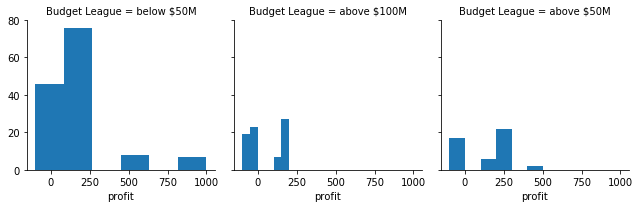

In [37]:
def label_category (row):
  if row['Budget'] >= 100000000 :
    return 'above $100M'
  elif 50000000 <= row['Budget'] < 100000000 :
    return 'above $50M'
  else :
      return 'below $50M'


profit['Budget League'] = profit.apply (lambda row: label_category(row), axis=1)

def label_profit (row):
  if row['Profitability'] >= 1000 :
    return 1000
  
  elif 500 <= row['Profitability'] < 1000 :
    return 500
  elif 200 <= row['Profitability'] < 500 :
    return 200
  elif 100 <= row['Profitability'] < 200 :
    return 100
  elif 0 <= row['Profitability'] < 100 :
    return 200
  elif -50 <= row['Profitability'] < 0 :
    return -50
  else :
      return -100


profit['profit'] = profit.apply (lambda row: label_profit(row), axis=1)

p = sns.FacetGrid(profit, col="Budget League")
p = p.map(plt.hist, "profit",bins=6)

#movies with a low budget are able to have crazy profitability rates,
# even if they aren't the ones that gross the most money.

In [0]:
sequels = df[df.Movie.str.contains(':') |df.Movie.str.contains('\d', regex=True) |df.Movie.str.contains('\.')]
#creating dataframe focused on sequels

In [64]:
sequels.head()

,Movie,IMDB Rating,Press Rating,Writ_Nominated,Acto_Prized,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Budget,US Gross,Average Rating
1,Furious 7,77.0,67.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,190000000,350034110,72.0
2,Star Wars: the Force Awakens,81.0,81.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,245000000,936627416,81.0
3,Mad Max :Fury Road,81.0,90.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,150000000,153629485,85.5
28,Mission Impossible: Rogue Nation,74.0,75.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150000000,195000874,74.5
33,Hunger Games 2,66.0,65.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,160000000,281666058,65.5


In [0]:
sequels = sequels[(df.Movie.str.contains('50') == False)
                  & (df.Movie.str.contains('8') == False) & 
                  (df.Movie.str.contains('13') == False)]
# manual cleaning of the list because the number of rows 
# was low enough to make it possible

#sequels.shape
nonsequels = df[(df.Movie.str.contains(':') == False) 
                & (df.Movie.str.contains('\d', regex=True) == False) & 
                (df.Movie.str.contains('\.') == False)]

In [59]:
sequels.Movie

1                                             Furious 7
2                          Star Wars: the Force Awakens
3                                    Mad Max :Fury Road
28                     Mission Impossible: Rogue Nation
33                                       Hunger Games 2
49                                      Pitch Perfect 2
65                           Maze Runner: Scorch trails
72                                            Mr. Right
76                                                Ted 2
85                                 Hotel Transilvania 2
93                                     Hitman: Agent 47
94                                  Incidious Chapter 3
124                                   X-men. Apocalypse
128                          Captain America: Civil War
130                              Underworld: blood wars
132                         Independence Day:Resurgence
137                             Warcraft: the Beginning
139                     Resident Evil:The Final 

In [63]:
sequels_average_gross = sum(sequels['US Gross'])/len(sequels['US Gross'])
non_sequel_average_gross = sum(nonsequels['US Gross'])/len(nonsequels['US Gross'])

difference = sequels_average_gross - non_sequel_average_gross
print ('on average, a sequel / movie that\'s part of a series earns',round(difference,0),'more than other movies')

on average, a sequel / movie that's part of a series earns 77638645.0 more than other movies
